# Example: constructing the QSP protocol for solving linear systems

We can use QSP/QSVT to solve linear systems (see [arXiv:2105.02859](https://arxiv.org/abs/2105.02859), Section IV.B, Appendix C). The idea is to approximate the function
$$g_{\kappa, \epsilon}(x) = \frac{1}{2\kappa} \frac{1 - (1 - x^2)^b}{x}$$
using a QSP polynomial $P(x)$, with $b = \lceil \kappa^2 \log(\kappa/\epsilon)\rceil$.

Here $\kappa$ is the condition number of the matrix $A$ we want to invert, and $\epsilon$ is the desired approximation guarantee.

In [1]:
import scipy as sp
import numpy as np

from nlft_qsp.poly import ChebyshevTExpansion
from nlft_qsp.qsp import chebqsp_approximate
from nlft_qsp.plot import plot_chebyshev

NumpyBackend -- chosen dtypes: complex128, float64


In [2]:
k = 5
eps = 0.1
b = np.ceil((k**2) * np.log(k/eps))

def f(x):
    return (1 - (1 - x**2)**b)/(2*x*k)

In [3]:
pf = chebqsp_approximate(f, deg=21)

Pl, Ql = pf.polynomials(mode='laurent')

Here `deg` is the degree of the approximating polynomial. To ensure $\epsilon$ we need to choose $d = \Theta(\kappa \log(\kappa/\epsilon))$.

/var/folders/qk/f8xx9bm14w5dy8kqvpzl4k7c0000gp/T/ipykernel_26239/400677495.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return (1 - (1 - x**2)**b)/(2*x*k)


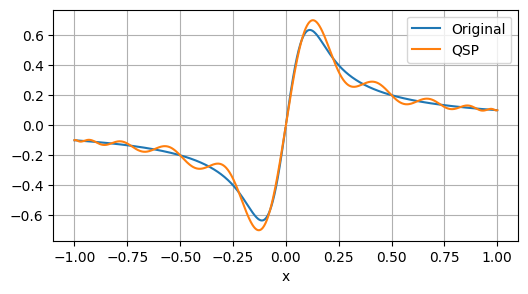

In [4]:
plot_chebyshev({ "Original": f,
                 "QSP": ChebyshevTExpansion.from_laurent_polynomial(Pl)
                })